In [1]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 951.0 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=813d08780964fc9d9f24acc8d7ec181a5e0d40deb9fa0759bdec47ee2f0102e8
  Stored in directory: /root/.cache/pip/wheels/83/71/2b/40d17d21937fed496fb99145227eca8f20b4891240ff60c86f
Successfully built sentence_transformers


In [2]:
!python -m spacy download el_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 MB 13.7 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_md')


In [3]:
from shutil import copyfile

copyfile(src = "/kaggle/input/trainer-am/confusion_matrix.py", dst = "../working/confusion_matrix.py")
copyfile(src = "/kaggle/input/trainer-am/metrics.py", dst = "../working/metrics.py")
copyfile(src = "/kaggle/input/trainer-am/stratification.py", dst = "../working/stratification.py")
copyfile(src = "/kaggle/input/trainer-am/kfold.py", dst = "../working/kfold.py")
copyfile(src = "/kaggle/input/trainer-am/trainer.py", dst = "../working/trainer.py")
copyfile(src = "/kaggle/input/trainer-am/visualizations.py", dst = "../working/visualizations.py")

'../working/visualizations.py'

In [4]:
from trainer import Trainer

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [6]:
import matplotlib.pyplot as plt

In [25]:
import numpy as np

In [32]:
import pandas as pd

# Setup

In [7]:
path = "/kaggle/input/iliad-sentiments/iliad_sentiments.csv"
target = "class"

In [8]:
scenarios = {
    "TF-IDF sem lematização": {"lemmatize": False, "sbert": False},
    "TF-IDF com lematização": {"lemmatize": True, "sbert": False},
    "SBERT sem lematização": {"lemmatize": False, "sbert": True},
           }

classifiers = {
    "Decision Tree": DecisionTreeClassifier(), 
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

STANDARD = "Sem modificação"
WITHOUT_NARRATOR = "Sem narrador"
MERGE_NARRATOR_NEUTRAL = "Junção de narrador e neutro"

data_operations = [STANDARD, WITHOUT_NARRATOR, MERGE_NARRATOR_NEUTRAL]

nro_folds = 5

# Trainer

In [9]:
metrics = {}

for classifier in classifiers:  
    metrics[classifier] = {}
        
    for scenario in scenarios: 
        metrics[classifier][scenario] = {}

for classifier in classifiers:       
    for scenario in scenarios: 
        for operation in data_operations:
            trainer = Trainer(path, target)

            if operation == STANDARD:
                trainer.prepare_data_to_train(lemmatize=scenarios[scenario]["lemmatize"], sbert=scenarios[scenario]["sbert"])
            if operation == WITHOUT_NARRATOR:
                trainer.remove_class(["narrator"])
                trainer.prepare_data_to_train(lemmatize=scenarios[scenario]["lemmatize"], sbert=scenarios[scenario]["sbert"])
            elif operation == MERGE_NARRATOR_NEUTRAL:
                trainer.merge_class(["narrator"], "neutral")
                trainer.prepare_data_to_train(lemmatize=scenarios[scenario]["lemmatize"], sbert=scenarios[scenario]["sbert"])
                
            metrics[classifier][scenario][operation] = trainer.cross_validation(model=classifiers[classifier], nro_folds=nro_folds)
            print(f"{classifier} : {scenario} : {operation}")
            print(metrics[classifier][scenario][operation])
            print("=======================")


Decision Tree : TF-IDF sem lematização : Sem modificação
{'accuracy': [0.3387096774193548, 0.5040650406504065, 0.4180327868852459, 0.45081967213114754, 0.4], 'recall': [0.34944838455476757, 0.529087213970293, 0.3094237079573421, 0.3732345501777413, 0.41844896285011135], 'precision': [0.3474823422191843, 0.47549773755656105, 0.3561320754716981, 0.38443819308545335, 0.4241282554211616], 'f1': [0.34846259028319615, 0.5008631133297508, 0.3311389069365531, 0.37875353797054806, 0.4212694688340664]}
Decision Tree : TF-IDF sem lematização : Sem narrador
{'accuracy': [0.3793103448275862, 0.4, 0.43859649122807015, 0.35964912280701755, 0.3893805309734513], 'recall': [0.3523509324927765, 0.3364289218966056, 0.33934919332786434, 0.32958709324582985, 0.32708308918317125], 'precision': [0.34572533849129594, 0.34437512378688845, 0.31476190476190474, 0.3148148148148148, 0.35562456866804687], 'f1': [0.3490066930138307, 0.3403556496416453, 0.32659344500721327, 0.32203163407074914, 0.34075722213365545]}
D

Batches:   0%|          | 0/20 [00:00<?, ?it/s]

Decision Tree : SBERT sem lematização : Sem modificação
{'accuracy': [0.4274193548387097, 0.45528455284552843, 0.30327868852459017, 0.3524590163934426, 0.4166666666666667], 'recall': [0.37513297872340423, 0.3922445804897632, 0.24552399507793274, 0.30394790812141104, 0.27792101253955237], 'precision': [0.3741525865665415, 0.3863425925925926, 0.24509343210968595, 0.2903414189204221, 0.2808876811594203], 'f1': [0.37464214125481016, 0.38927121688088645, 0.24530852466404518, 0.2969889005449111, 0.27939647195169093]}


Batches:   0%|          | 0/18 [00:00<?, ?it/s]

Decision Tree : SBERT sem lematização : Sem narrador
{'accuracy': [0.45689655172413796, 0.4956521739130435, 0.40350877192982454, 0.4473684210526316, 0.415929203539823], 'recall': [0.4115839243498818, 0.41993844506891476, 0.33935830826725005, 0.3736760550542339, 0.3701707097933513], 'precision': [0.4144597413433459, 0.42618194231097456, 0.3462902345881069, 0.37721872816212443, 0.3726315789473684], 'f1': [0.41301682686223107, 0.42303715839946293, 0.34278923044128795, 0.3754390345566788, 0.37139706799829897]}


Batches:   0%|          | 0/20 [00:00<?, ?it/s]

Decision Tree : SBERT sem lematização : Junção de narrador e neutro
{'accuracy': [0.4274193548387097, 0.4146341463414634, 0.36885245901639346, 0.4049586776859504, 0.5206611570247934], 'recall': [0.4074645104555681, 0.4016371982615678, 0.3504238446814329, 0.36850871305342175, 0.5008700623959031], 'precision': [0.40764966740576497, 0.40213731518079343, 0.3486394557823129, 0.3621933621933622, 0.4963151927437642], 'f1': [0.4075570679010383, 0.4018871011321885, 0.349529372867476, 0.3653237462978048, 0.49858222487011405]}
KNN : TF-IDF sem lematização : Sem modificação
{'accuracy': [0.4112903225806452, 0.3821138211382114, 0.3770491803278688, 0.3524590163934426, 0.35833333333333334], 'recall': [0.33183116627265563, 0.3482102234711628, 0.23205496308449547, 0.25854012852064534, 0.28944978319465603], 'precision': [0.49761198945981555, 0.5135467980295567, 0.27048494983277593, 0.49744897959183676, 0.5389957264957265], 'f1': [0.3981542693372127, 0.415017785392359, 0.2498005568711485, 0.3402443811320

Batches:   0%|          | 0/20 [00:00<?, ?it/s]

KNN : SBERT sem lematização : Sem modificação
{'accuracy': [0.31451612903225806, 0.34146341463414637, 0.3114754098360656, 0.4426229508196721, 0.38333333333333336], 'recall': [0.2295557525610717, 0.2620182657567242, 0.20483319660924254, 0.3434201531309817, 0.3293536856908473], 'precision': [0.44957983193277307, 0.3573450134770889, 0.2967948717948718, 0.5002437079049982, 0.4049107142857143], 'f1': [0.3039264589044464, 0.30234572777355073, 0.24238453211114325, 0.4072564411152797, 0.3632447280025303]}


Batches:   0%|          | 0/18 [00:00<?, ?it/s]

KNN : SBERT sem lematização : Sem narrador
{'accuracy': [0.3793103448275862, 0.3739130434782609, 0.3684210526315789, 0.5263157894736842, 0.40707964601769914], 'recall': [0.3042027843446283, 0.2848922788706008, 0.2992252301522195, 0.4287029441254216, 0.33362631352787214], 'precision': [0.515079365079365, 0.32801701222753854, 0.4127906976744186, 0.5888341543513957, 0.42740740740740746], 'f1': [0.3825021138951167, 0.3049375021037689, 0.3469512034466657, 0.4961685150348305, 0.374738605623404]}


Batches:   0%|          | 0/20 [00:00<?, ?it/s]

KNN : SBERT sem lematização : Junção de narrador e neutro
{'accuracy': [0.3629032258064516, 0.36585365853658536, 0.3360655737704918, 0.5041322314049587, 0.3884297520661157], 'recall': [0.36088555407087625, 0.32127834115860576, 0.30065627563576697, 0.4861287195167425, 0.372697442016556], 'precision': [0.4655973709058358, 0.40688131313131315, 0.47985347985347987, 0.5771428571428572, 0.4966217357521705], 'f1': [0.4066081950284221, 0.3590480537094304, 0.369683938192871, 0.5277404649572663, 0.4258266820702699]}
Random Forest : TF-IDF sem lematização : Sem modificação
{'accuracy': [0.28225806451612906, 0.2926829268292683, 0.2786885245901639, 0.2540983606557377, 0.26666666666666666], 'recall': [0.221483451536643, 0.25340057540479055, 0.1689909762100082, 0.2093416735028712, 0.23397398335872494], 'precision': [0.40931372549019607, 0.708030523255814, 0.2673160173160173, 0.4115761689291101, 0.7267857142857143], 'f1': [0.28743380593484624, 0.37322558474991396, 0.20707435541076474, 0.27752478054118

Batches:   0%|          | 0/20 [00:00<?, ?it/s]

Random Forest : SBERT sem lematização : Sem modificação
{'accuracy': [0.24193548387096775, 0.1951219512195122, 0.20491803278688525, 0.23770491803278687, 0.24166666666666667], 'recall': [0.1765415681639086, 0.14455790847049377, 0.12653814602132896, 0.1475594749794914, 0.1475594749794914], 'precision': [0.5714285714285714, 0.4671875, 0.2357142857142857, 0.2908653846153846, 0.28804347826086957], 'f1': [0.26974578463419796, 0.2207965827889536, 0.16467438775840315, 0.1957915592797996, 0.19514810038483585]}


Batches:   0%|          | 0/18 [00:00<?, ?it/s]

Random Forest : SBERT sem lematização : Sem narrador
{'accuracy': [0.35344827586206895, 0.33043478260869563, 0.21929824561403508, 0.3333333333333333, 0.336283185840708], 'recall': [0.26871552403467297, 0.25183995717917834, 0.17063166529942575, 0.25430680885972107, 0.25909215203718894], 'precision': [0.43179487179487186, 0.3693617021276596, 0.32088122605363983, 0.42901960784313725, 0.39050211736237145], 'f1': [0.33127270042135676, 0.29948418151765327, 0.22279170670021758, 0.3193279368161176, 0.3115053156365305]}


Batches:   0%|          | 0/20 [00:00<?, ?it/s]

Random Forest : SBERT sem lematização : Junção de narrador e neutro
{'accuracy': [0.21774193548387097, 0.2601626016260163, 0.2459016393442623, 0.17355371900826447, 0.2727272727272727], 'recall': [0.18969632598988131, 0.21909599194782378, 0.2011211375444353, 0.14451736395952966, 0.240584681930047], 'precision': [0.5325814536340853, 0.6878048780487805, 0.3543771043771044, 0.4058479532163743, 0.6056214317083882], 'f1': [0.2797503893788178, 0.33233024029012953, 0.25660828774357525, 0.21313870818809227, 0.3443682033709295]}


# Visualizations 

In [10]:
from visualizations import compare_boxplot

In [15]:
import matplotlib.pyplot as plt

def compare_boxplot(dict_metrics, labels, width=20, height=5):
    result = {}
    
    for model in dict_metrics:
        result[model] = {}
    
    #plot
    for model in dict_metrics:
        #line
        for scenario in dict_metrics[model]:
            if scenario not in result[model]:
                result[model][scenario] = {}
            #Values
            for data_operation in dict_metrics[model][scenario]:
                for metric in dict_metrics[model][scenario][data_operation]:
                    if metric not in result[model][scenario]:
                        result[model][scenario][metric] = []
                        result[model][scenario][metric].append(dict_metrics[model][scenario][data_operation][metric])
                    else:
                        result[model][scenario][metric].append(dict_metrics[model][scenario][data_operation][metric])
    
    for title in result:
        firts_key = list(result[title].keys())[0]
        number_metrics = len(result[title][firts_key])
        scenarios = result[title]

        for idx_scenario, scenario in enumerate(scenarios):
            fig, ax = plt.subplots(number_metrics//2, 2, figsize=(width, height))
            fig.suptitle(f"{title} utilizando {scenario}")
        
            metrics = scenarios[scenario]

            line = 0
            collum = 0
            for idx_metric, metric in enumerate(metrics):
                results=[]

                if idx_metric %2 == 0 and idx_metric != 0:
                    line += 1
                    collum = 0

                for values in metrics[metric]:
                    results.append(values)

                ax[line][collum].set_ylim(bottom=0, top=1)
                ax[line][collum].boxplot(results, labels=labels, showmeans=True)
                ax[line][collum].set_title(metric)

                collum += 1


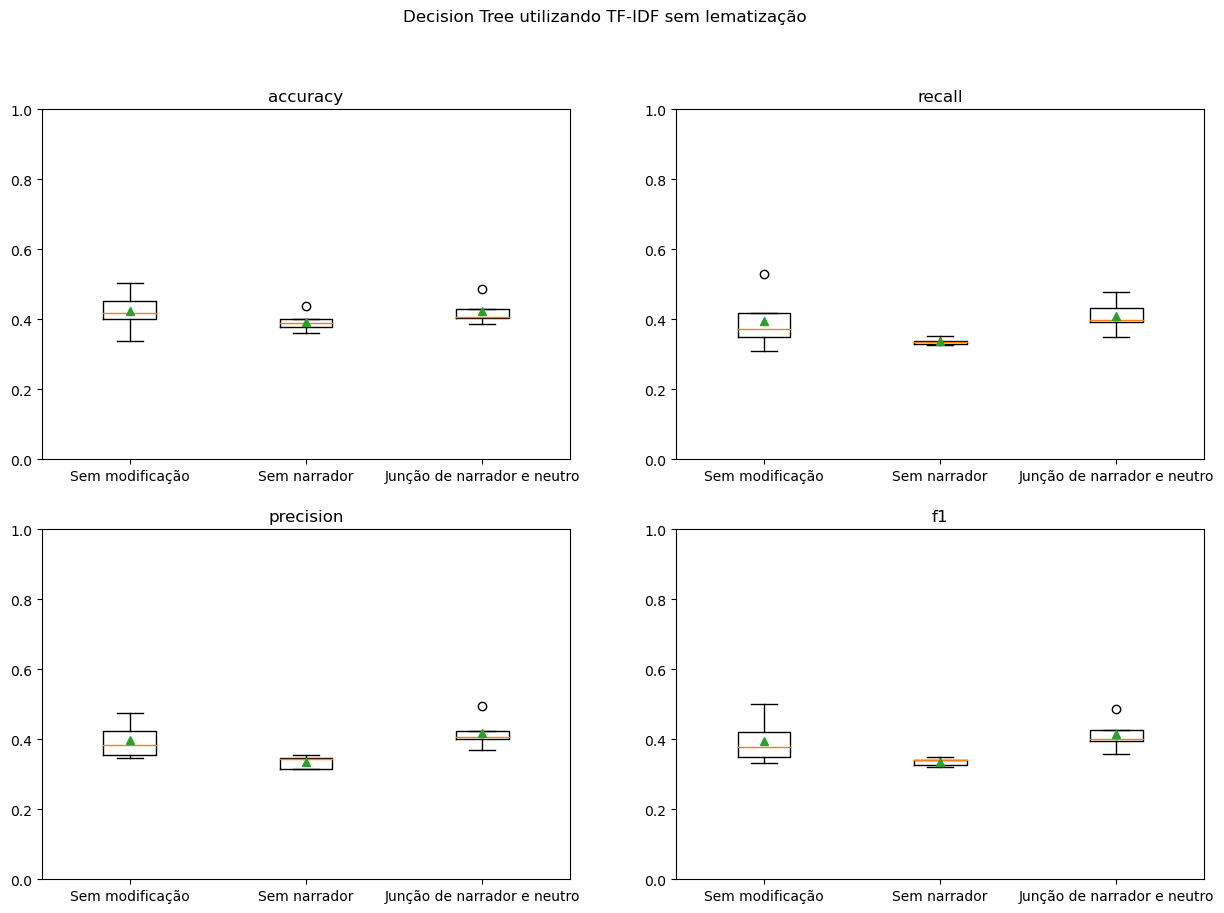

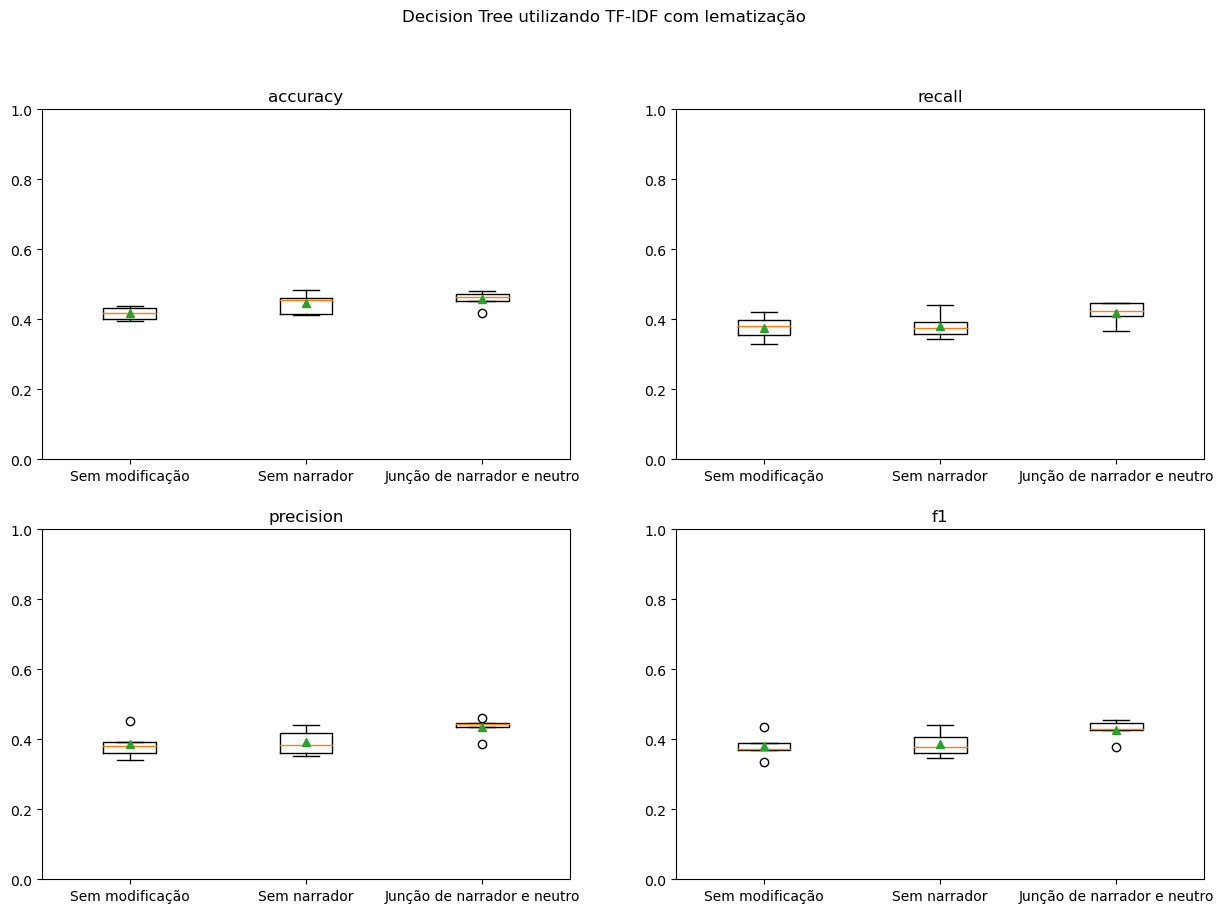

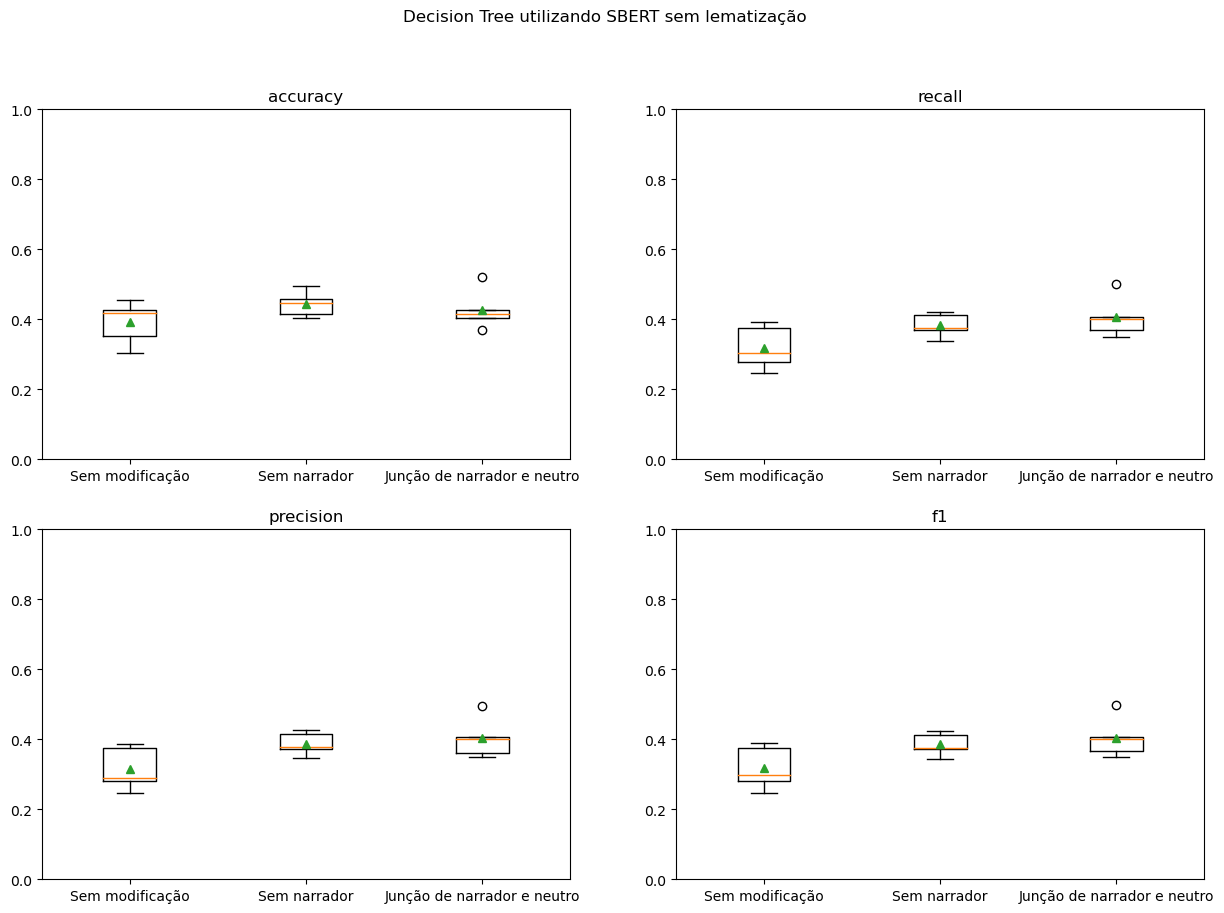

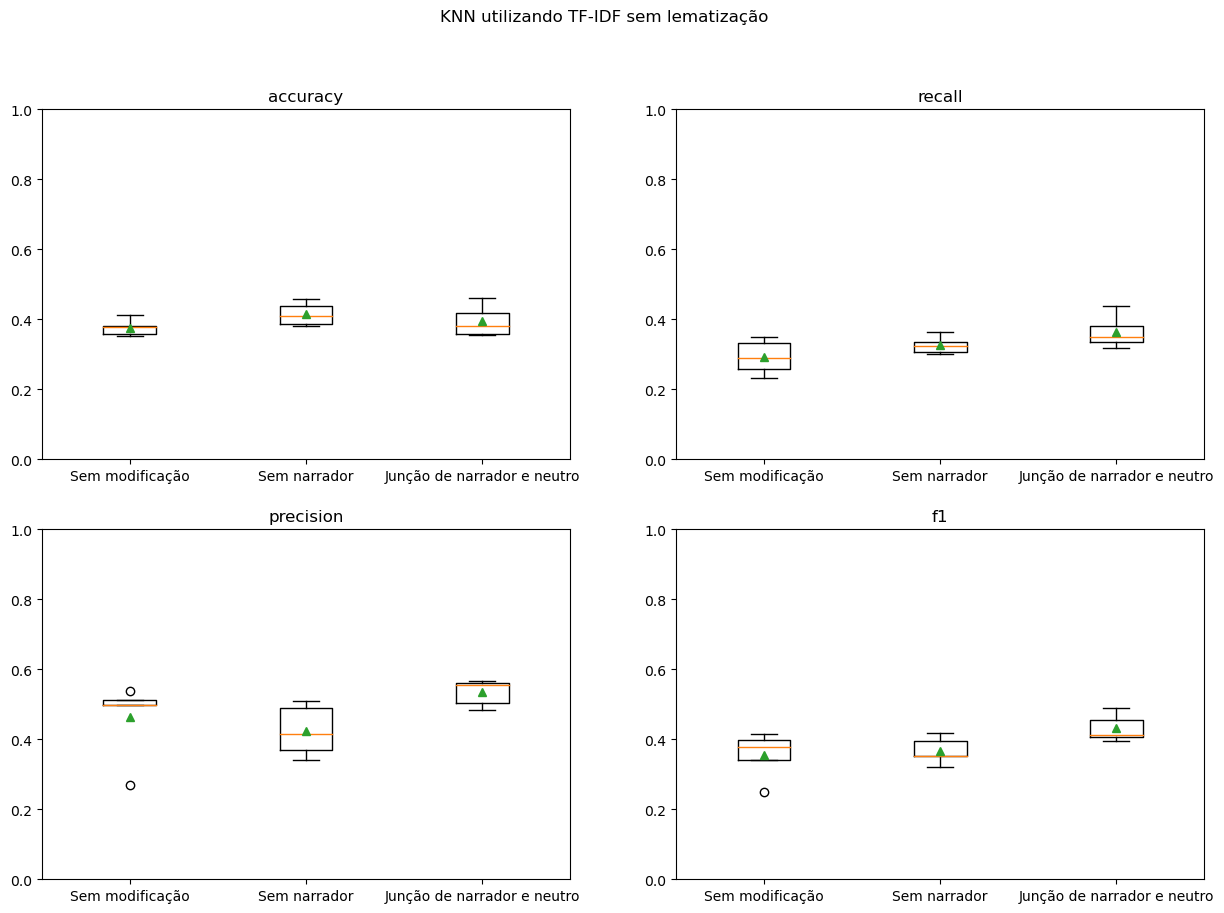

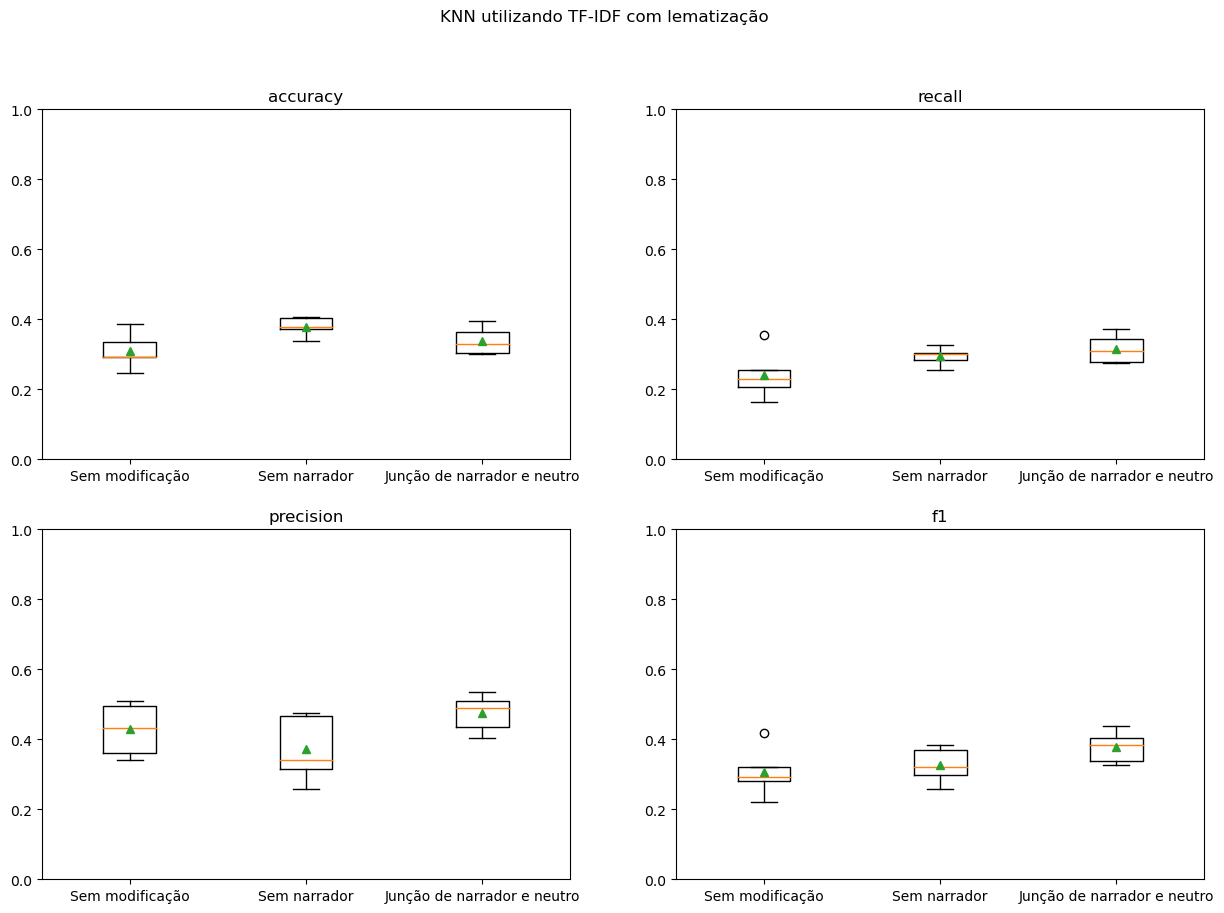

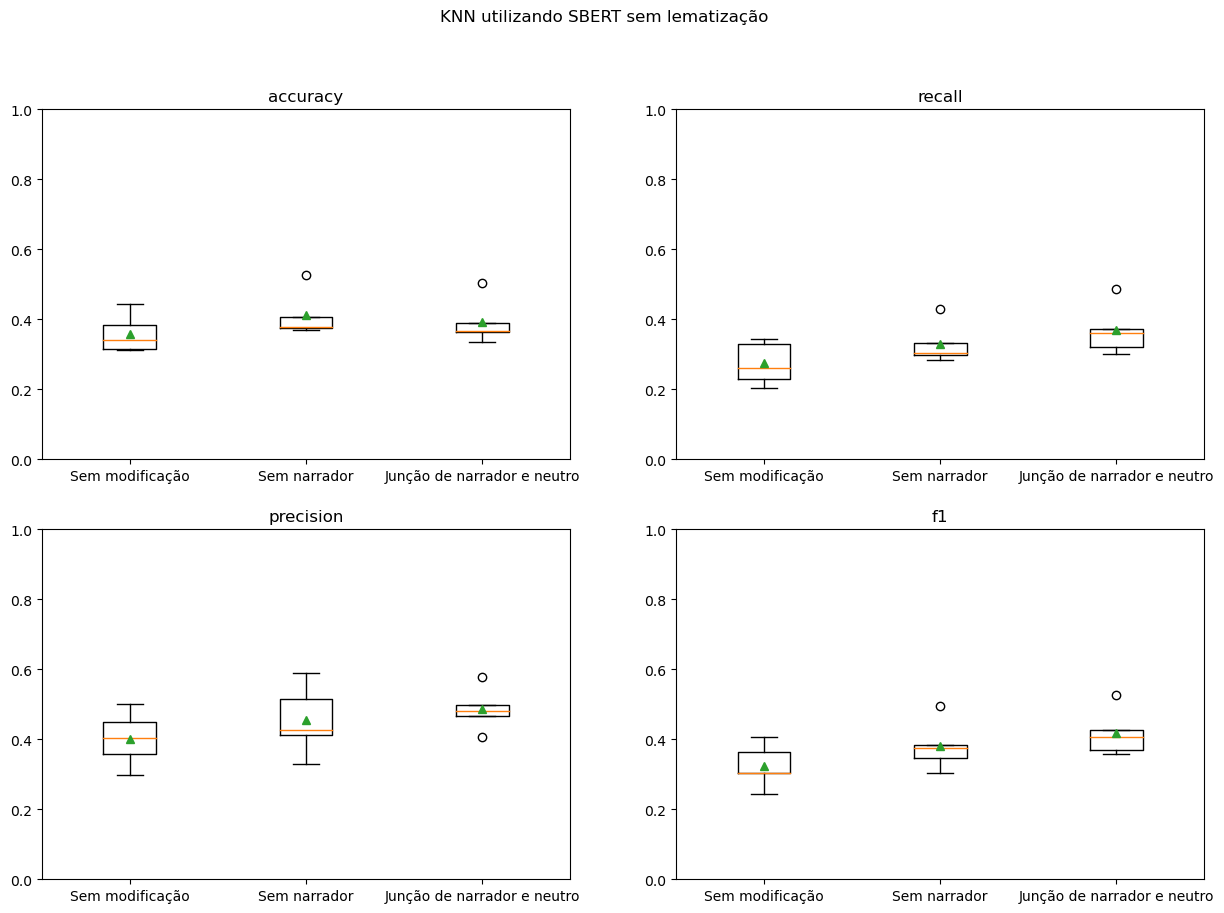

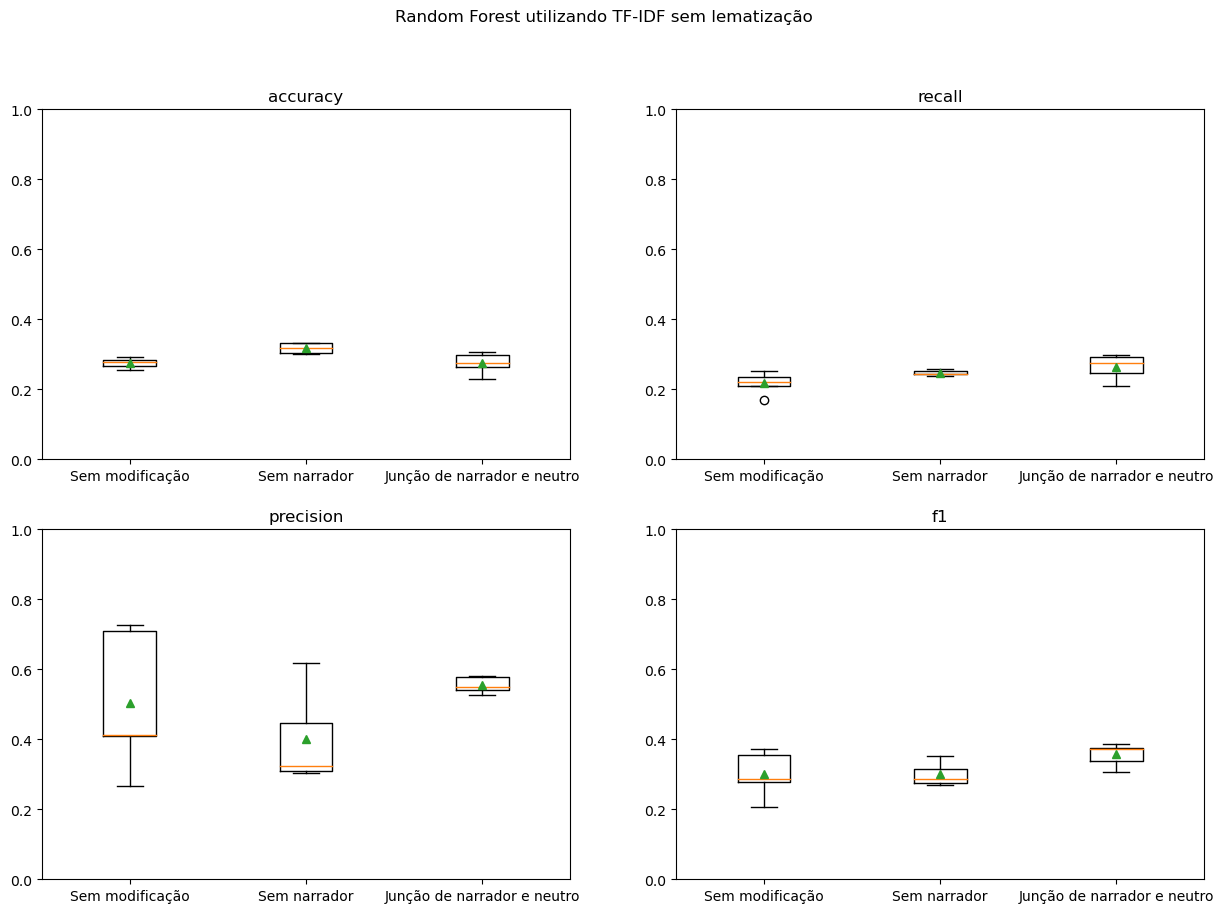

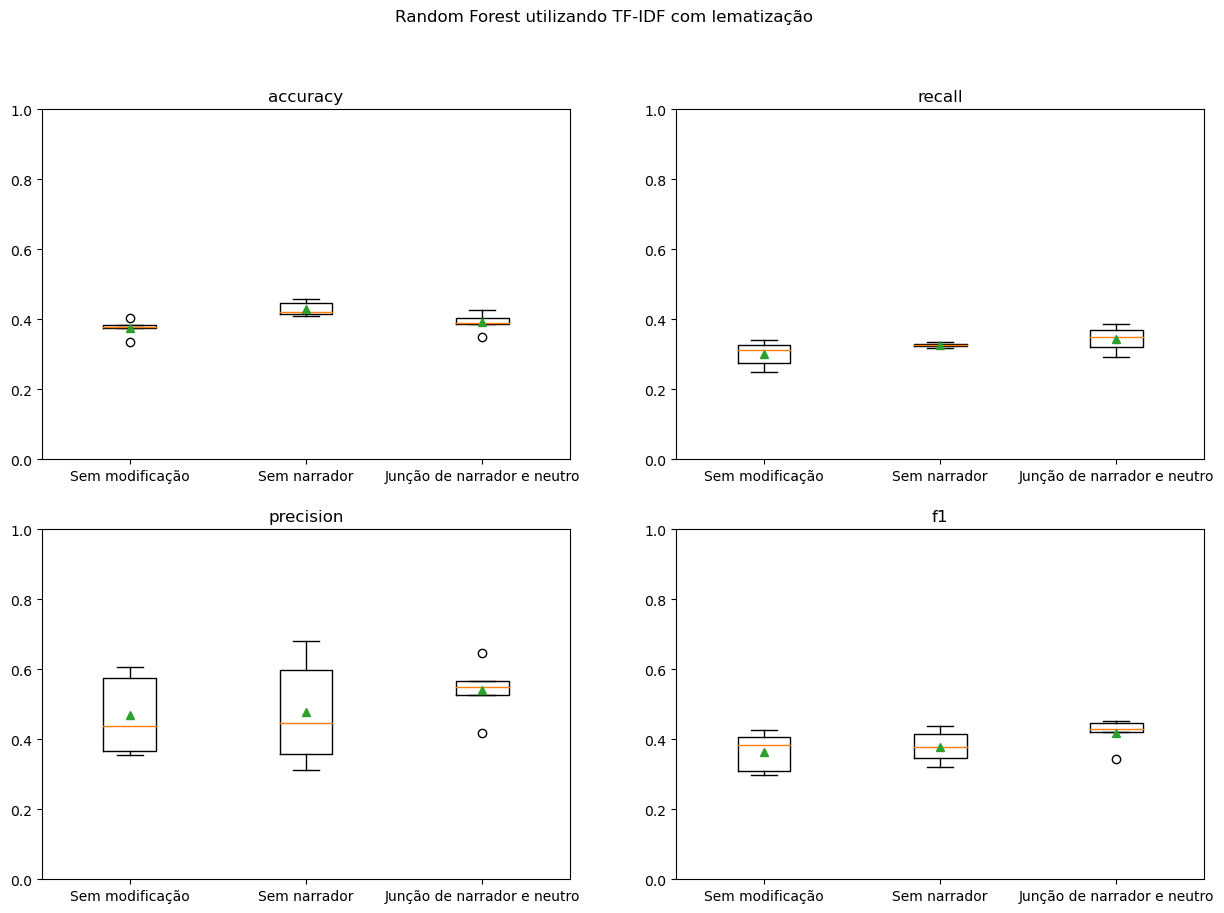

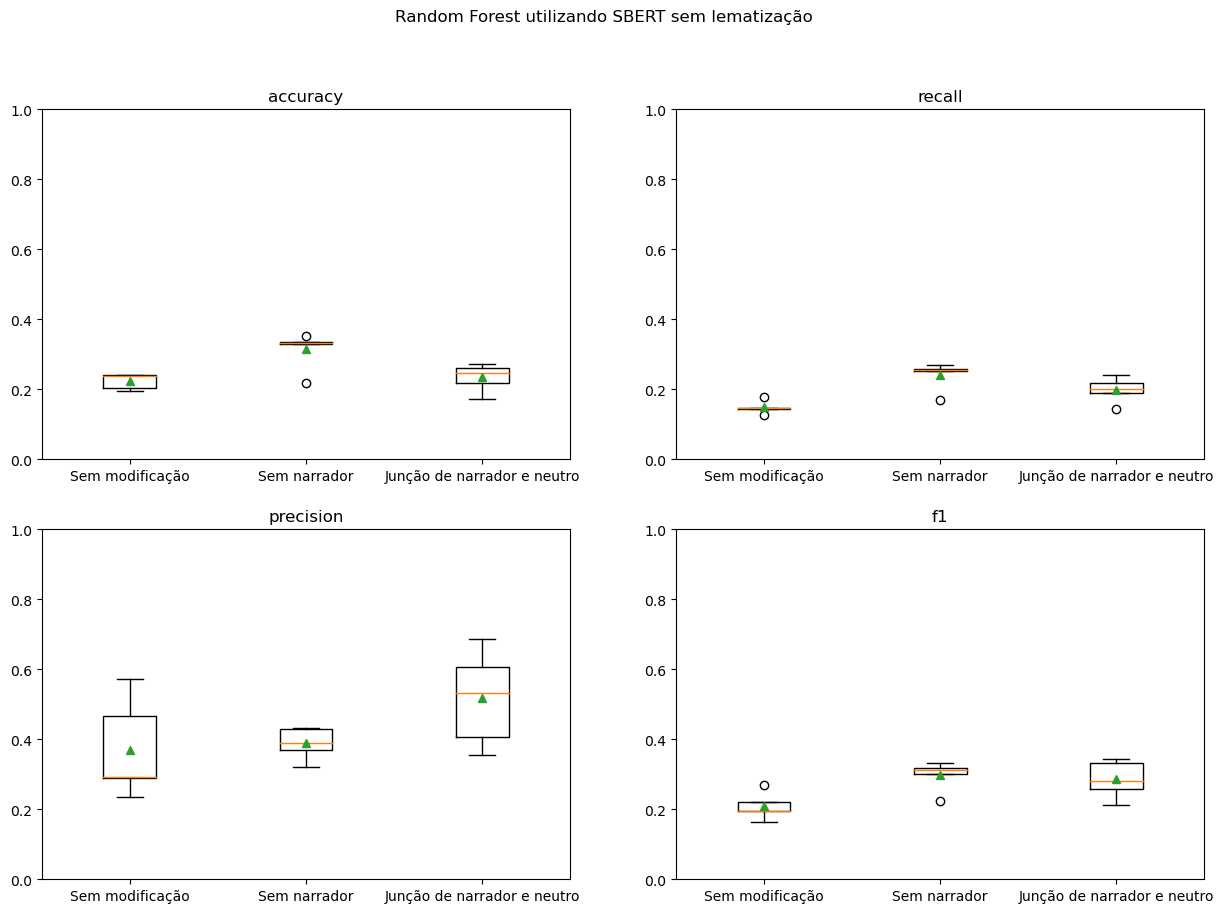

In [55]:
compare_boxplot(metrics, data_operations, width=15, height=10)

In [53]:
from pprint import pprint

In [54]:
pprint(metrics)

{'Decision Tree': {'SBERT sem lematização': {'Junção de narrador e neutro': {'accuracy': [0.4274193548387097,
                                                                                          0.4146341463414634,
                                                                                          0.36885245901639346,
                                                                                          0.4049586776859504,
                                                                                          0.5206611570247934],
                                                                             'f1': [0.4075570679010383,
                                                                                    0.4018871011321885,
                                                                                    0.349529372867476,
                                                                                    0.3653237462978048,
                                 

In [14]:
data_operations

['Sem modificação', 'Sem narrador', 'Junção de narrador e neutro']